In [5]:
import pandas as pd
import sqlite3 as sql

In [6]:
conn = sql.connect("databaseWine.db")
cursor = conn.cursor()
data = pd.read_sql_query("SELECT * FROM erpWeb",conn)
data['chiffreAffaire'] = data['price'] *  data['total_sales']

[[17.16039117 20.42079324]
 [22.07479941 23.41142662]
 [18.3266662  18.71504626]
 ...
 [ 4.84861587  2.6427736 ]
 [19.61215752 15.6524108 ]
 [ 6.93287992  1.23364054]]


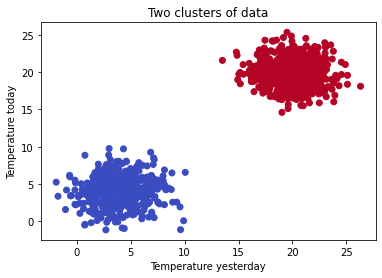

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Configuration options
num_samples_total = 1000
cluster_centers = [(20,20), (4,4)]
num_classes = len(cluster_centers)

# Generate data
X, targets = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 2)

np.save('./clusters.npy', X)
X = np.load('./clusters.npy')

print(X)
# Fit K-means with Scikit
kmeans = KMeans(init='k-means++', n_clusters=num_classes, n_init=10)
kmeans.fit(X)

# Predict the cluster for all the samples
P = kmeans.predict(X)

# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', P))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Two clusters of data')
plt.xlabel('Temperature yesterday')
plt.ylabel('Temperature today')
plt.show()